# NumPy

The python package **NumPy** is an indespensible tool for efficient data manipulation and numerical processing. 
It is a highly curated and tested collection of functions centered around the manipulation of thier proprietary data type, the `numpy.array`. 
The `numpy.array` is similar to the standard `list` type, but it has some important differences that make it particularly useful for generic vector and matrix algebra and element-wise data manipulation.

## Learning objectives 
* What is scientific computing?
* What is NumPy?
* What are the benefits of NumPy?
* What is a `numpy.array`, and why use it?
* Where is the NumPy documentation located? Right [here](https://numpy.org/doc/stable/reference/index.html)!

## What's the deal with NumPy?

[**NumPy**](https://numpy.org/) is the foundational Python package for scientific computing.
Scientific computing encompasses any tools, functions, or algorithms that are used to generate or simulate mathematical models and problems. 
Python in its base form is fine for some data manipulation with support for generic algorithm construction (e.g. loops and function declaration), but as soon as you need to do any mathematics, especially on a large scale (e.g. large data sets), generic Python falls short with respect to efficient built-in functionality.
NumPy is a heavily curated and tested package that contains thousands, if not hundreds of thousands, of useful functions for generic mathematical manipulation of your data.
This includes general mathematics, like find the natural logarithm, as well as general statistics, like the variance and quanitles.
These included functions are also very effienct with respect to compuational time and memory, so they should be used whenever possible.

So what makes NumPy so efficient? 
Part of the efficiency comes from the the fact that the algorithms used behind the scenes are tuned to be as efficient as possible by dedicated computer scientists.
Another reason that the code is efficient is that large chunks of the code are written in *C* and *C++* rather than in Python.
A pre-compiled *C* or *C++* function is called by NumPy to execute your code, and the results are passed back to you in Python. 
It is not necessarily important to understand why this is more efficient, but it is important to point out that it is done in this manner because it is more efficient than strictly using Python.
They are playing 4-dimensional chess while you are playing checkers, metaphorically, so there is no use in reinvinteing the wheel with respect to creating homemade functions.

A final reason that NumPy is so efficient is the introduction of the `numpy.array`.
The `numpy.array` is a generic n-dimensional array object.
The easiest way to think about it is that a `numpy.array` is an n-dimensional matrix which can be used to store and manipulate your data or just do simple matrix and vector algebra.
The reason this object is more efficient than the standard Python `list` is how the memory is stored in each case.
In a standard `list` all of the members are stored in random spots in memory, so when they need to be accessed, the computer has to search around for them.
In a `numpy.array` all of the data points are stored in sequential memory.
This means that if you are at a point in your array, `my_array[a][b][c]`, and want to access the adjacent piece of data, `my_array[a][b][c+1]`, the computer can just accesses the adjacent memory address instead of searching through all of the memory for the correct piece of data.
In the previous example `my_array` designates a 3-dimensional array as seen by the three different indexes following the `my_array` call.
Most functions in Numpy are built around manipulating these objects, and are coded in such a way as to take advantage of the memory allocation in an optimal way, and are therefore very efficient.

In order to demonstrate the power of NumPy, we can start with the standard dot product. In the code block below we generate two vectors of length 1000 and store them in `numpy.array` objects and `list` objects. We create a generic function, `my_dot_0`, that takes the dot product of two input vectors using a standard for loop. We then time the output.  

In [1]:
# np is the standard abbreviation for numpy
import numpy as np 
 
# This example uses the random package so setting the seed ensures
# we get the same result every time we run this block.
np.random.seed(5)
        
# generic code block to run a dot product with any array like object
def my_dot_0(a0, a1):
    dot = 0
    for i in range(len(a0)):
        dot += a0[i] * a1[i]
    return dot

# create the vectors as numpy arrays
# np.random.randn is the normal distribution with the number
# in the parentheses indicating the size of the array you want
A_arr = np.random.randn(10000)
B_arr = np.random.randn(10000)

# copy the vectors as lists
A_list = list(A_arr)
B_list = list(B_arr)

# %timeit is a built it jupyter notebook function for timing functions easily
# -n 10 is a statement about how many runs it will use for the time output
# tmp is a placeholder variable to prevent output clutter
print("list time for my_dot_0:")
%timeit -n 10 tmp = my_dot_0(A_list, B_list)
print("\nnp.array time for my_dot_0:")
%timeit -n 10 tmp = my_dot_0(A_arr, B_arr)

list time for my_dot_0:
3.3 ms ± 305 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

np.array time for my_dot_0:
4.89 ms ± 493 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In a surprise result, seemingly contrary to everything previously stated, the `list` manipulation came out faster than the manipulation using the `numpy.array`. 
The small caveat is that the `numpy.array` object is built for speed when used with NumPy's built in functions. 
We can try the test again, but this time we use some built in functions from NumPy to clean up the function definition and improve our results, hopefully.

In [2]:
# using built in NumPy functions
# np.multiply does element-wise multiplication
# np.sum adds the elements of the array together 
def my_dot_1(a0, a1):
    return np.sum(np.multiply(a0, a1))

print("list time for my_dot_1:")
%timeit -n 10 tmp = my_dot_1(A_list, B_list)
print("\nnp.array time for my_dot_1:")
%timeit -n 10 tmp = my_dot_1(A_arr, B_arr)

list time for my_dot_1:
1.49 ms ± 171 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

np.array time for my_dot_1:
21.8 µs ± 14.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


That's more like it! 
Notice that the `list` speed sees some improvement using the built in NumPy functions as well, but certainly not as much as the `numpy.array`. 
In general the NumPy functions can handle generic `list` types, but the full potential is unlocked with the `numpy.array` type.
For this final speed test, we can use the the totally pre-built `numpy.dot` function and check out the speed.

In [3]:
print("list time for np.dot:")
%timeit -n 10 tmp = np.dot(A_list, B_list)
print("\nnp.array time for np.dot:")
%timeit -n 10 tmp = np.dot(A_arr, B_arr)

list time for np.dot:
2.97 ms ± 399 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

np.array time for np.dot:
The slowest run took 14.49 times longer than the fastest. This could mean that an intermediate result is being cached.
15.5 µs ± 24.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Will you look at that! 
The totally pre-built function is even faster than our last test with the two different functions. 
Notice that the `list` test really struggles, comparitively, with this function. 
Together, all of these speed tests should highlight:
1. NumPy functions are very efficient.
2. NumPy functions are relatively easy to use and clean up your code.
3. NumPy functions work best with `numpy.array` objects.
4. If you can find a NumPy function to handle your `numpy.array` objects, you should use it rather than trying to build your own function.

## What's the deal with NumPy arrays?

Now that we know why we should use the humble `numpy.array`, we should probably learn how to use this object.
As mentioned previously is, it is very similar to you standard `list` with a few built in features that make it easier to use in a a numerical sense.
The first feature that is crucial is that unlike a list all of the rows/columns should have the same length, much like any matrix you would normally deal with.
This means that `numpy.array` are best suited for comparing tests or doing data manipulation on data that would fit into a traditional n-dimensional matrix. 
Below is an example of a data set that is fine in a `list` but should be avoided in a `numpy.array`.
Python will throw a warning that this functionality is depricated (outdated, no longer supported).

In [4]:
my_list = [[0, 1, 1], [2, 3]]
print(my_list)
my_matrix = np.array(my_list)

[[0, 1, 1], [2, 3]]


/home/marshall/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


Now that we know what data works best in a `numpy.array`, we can look into how to build these arrays.
In the first example we will look at how to make a (2,3,4) matrix that is filled with 0s for simplicity.
In this case we use the built in `shape` attribute of the array to check its dimensions.

In [5]:
# can make an array of any size filled with 
a0 = np.zeros((2, 3, 4)) # just outputs 0s for the shape that you tell it
a1 = np.array([[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]])
a2 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
a2.resize((2, 3, 4)) # resize changes the shape of the original array, this can be called on any array

#check that the shapes are equivalent
print('a0 shape =',a0.shape,', a1 shape =', a1.shape,', a2 shape =', a2.shape,'\n')

# sanity check on the dimensions of the above arrays
print('the above arrays have dimension', a0.ndim, '\n')

# this how the resize works with respect to rows/columns in that it starts by filling rows
# np.arange creates an array with 12 numbers from 0-11
a3 = np.arange(12)
a3.resize((3, 4))
print(a3)

a0 shape = (2, 3, 4) , a1 shape = (2, 3, 4) , a2 shape = (2, 3, 4) 

the above arrays have dimension 3 

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


At some point it might also be helpful to sort data within an array, find specific instances of things within an array, delete rows or columns, or add data. 
This can all be done using NumPy's built in functions as well. 
In the following example we will try to use NumPy to manipulate a data set in a way that would be potentially be useful for your own data. 
We can also run some simple statistics for fun!

the location of the NaN is (3, 5) 

row 2 mean = 0.02053209316073448 and variance = 1.0315188879373587
row 4 mean = -0.10027662190124971 and variance = 0.8912458143138923


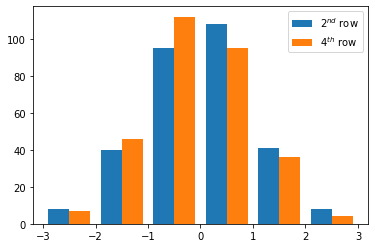

In [6]:
# generate a 5x30 array full or of random numbers
a0 = np.random.randn(5, 300)

# pretend that one of the data points was unfilled, or a NaN
a0[3][5] = np.nan

# we want to be able to find that nan
# np.isnan sets all instances of nan to true within the array, everything else is false
# np.where generates a tuple of arrays that show the indices of where the trues are located
# the tuple that np.where generates will always have the same dimension as the array queried
where_nan = np.where(np.isnan(a0))
# we are using NaN in this example but you could use any generic conditional to check
where_negative = np.where(a0 < 0.)

# here is a way you could print out the ordered pairs of where the nans were located
for i in range(len(where_nan[0])):
    print('the location of the NaN is',(where_nan[0][i],where_nan[1][i]),'\n')
    
# since the NaN would mess up our data we want to delete the row it is located in
row_delete = np.delete(a0, where_nan[0], 0)
# we could do the same thing if we wanted the column gone instead
col_delete = np.delete(a0, where_nan[0], 1)
# we could also replace the nan with a 0 if we knew what that value should be 
# the tilde (~) flips the boolean values since np.where replaces false not true
# unlike the previous np.where usage, this outputs our original array with replacements
# instead of a tuple. This has to do with the arguments fed into the function. 
# The NumPy documentation is wonderful an should be consulted regularly.
replace_nan = np.where(~np.isnan(a0), a0, 0.)

# let's plot some of the data we generated
# first we import the plotting package
import matplotlib.pyplot as plt

# we then want to plot the distribution of the 2nd and 4th rows
# we can take extract the rows using standard indexing
# we then have to take the transpose of the data so that the plt.hist function will read the data correctly
hist = plt.hist(np.transpose(replace_nan[[1, 3]]), [-3, -2, -1, 0, 1, 2, 3])
plt.legend(["$2^{nd}$ row","$4^{th}$ row"])

# we can output the mean and variance as well to see if it matches the expected 0,1
mean = np.average(replace_nan[[1 ,3]], axis = 1)
variance = np.var(replace_nan[[1, 3]], axis = 1)
rows = [2, 4]
for i in range(2):
    print('row', rows[i], 'mean =',mean[i], 'and variance =', variance[i])

# In class exercise

In this exercise we will walk through some of the stuff we have covered previously and introduce some new helper functions that should be useful for most people.
In general we will have an "expected" response curve, we will generate some data with noise, and then we will compare the noisy data to the expected response.
We are going to pretend that we are doing some sampling every 0.01s between 0.0s and 1.0s, and this will be our independent variable space, or our time domain.
We will start with generating the independent variable space using two different methods, using `np.arange` and `np.linspace`.
They are both useful, but sometimes one is better than the other depending on the context.
**For the exercise there will be a '''statement'''. 
The quotations and the statement should be correct answer to make the code run.

In [54]:
# we will start with generating an array that goes from 0-1 with a step size of 0.01
# np.linspace, as well as np.arange, but the work in slightly different ways
# np.linspace always includes the start and stop values, but the step size is variable
# in all cases replace the '''comment''' with the appropriate answer
t_linspace = np.linspace(0., 1., '''number of time steps here''') 

# np.arange always includes the start value with the specified step value, but may not include the 
# wanted last step
t_arange = np.arange(0., '''end of range value''', 0.01)  

# make sure the outputs are correct
print('The step size is', t_linspace[1] - t_linspace[0]) # uses np.linspace output
print('The final step is at', t_arange[-1])   # uses np.arange output
t = t_linspace # specify t for later use now that we have checked both

The step size is 0.01
The final step is at 1.0


Now that we have generated our independent variable space, we can specify what our expected response function should look like. 
In our case we would like to generate the following curve that we can pretend is expected position, *y*, given a time value, *t*, from our time domain. 

$y = 0.5 e^{t^2} + 1.5$

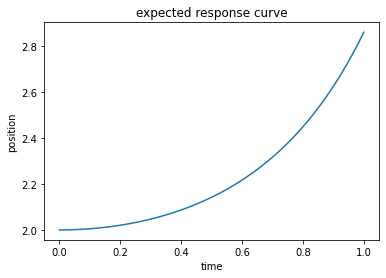

In [41]:
# this is fairly straight forward as you can use generic python syntax for everything but the exponential
# the only numpy specific function you might need is np.exp for the exponential
expected_response = '''appropriate response function'''

# plot expected curve
fig = plt.plot(t, expected_response)
plt.title('expected response curve')
plt.xlabel('time')
plt.ylabel('position');

Now that we have our expected value we can simulate noise in our data. 
We will do this through introducing random values such that the average should replicate our data.
Below we have *N* represent the normal distribution.
The `np.random.randn` function is N(0,1), and the transformation to the correct Normal distribution space is included below since this is not a statistics course. 
We will generate 50 samples of the same length as our *t* vector.

$t_{rand} = t * N_{mult}(\mu = 1, \sigma^2 = 0.001) + N_{add}(\mu = 0, \sigma^2 = 0.005)$

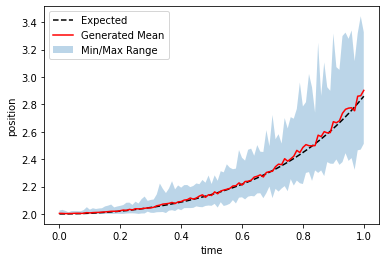

In [42]:
# create the two random arrays of shape 50 x length of the time domain
mult_rand = np.sqrt(0.001) * '''random Numpy function of correct dimension''' + 1.
add_rand = np.sqrt(0.005) * '''random Numpy function of correct dimension'''

# add noise to the t variable, this will come directly from the equation above
# it's a linear transformation of a*t + b, but using the appropriate NumPy syntax
t_rand = '''appropriate linear function'''

# use the same syntax as before to process the randomized time data
# this should be a direct copy from what you have in the previous code snippet
random_response = '''same response function as before but acted on t_rand'''

# find the min, max, and average response at each time step
r_max = np.max(random_response, axis = '''appropirate index that represents the row axis''')  
r_min = np.min(random_response, axis = '''appropirate index that represents the row axis''')
r_avg = np.mean(random_response, axis = '''appropirate index that represents the row axis''')

# this plots the output generated above as 
fig = plt.plot(t, expected_response, 'k--', t, r_avg, 'r')
plt.fill_between(t, r_min, r_max, alpha = 0.3)
plt.legend(['Expected', 'Generated Mean', 'Min/Max Range'], loc = 'upper left')
plt.xlabel('time')
plt.ylabel('position');

Let's finally do some procesing so we can finalize our data for output!
We can pretend that the 8th and 23rd sample ranges were done by a trainee that had set the sample frequency to be a little too slow.
We are also limited by our instruments in that they are unreliable when the position is greater than 3.25 so we will remove any samples that reached more than 3.25 at any time in the experiment.
**Side note:** this is not a real example, and data should only be excluded when appropriate.

The number of samples left after removing the bad trainee data is 48
The number of samples left after removing the data > 3.25 is 36
our final_data for output has shape (52, 101)


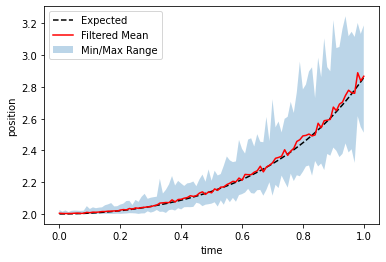

In [55]:
# remove the 8th and 23rd sample rows from the data
exclude_data = np.delete(random_response, ['''8th row index''', '''23rd row index'''], axis = 0)

# store the number of samples left over after removing the bad trainee data
# this should be equal to the number of rows left over in the data
number_of_samples = exclude_data.shape['''row index''']
print('The number of samples left after removing the bad trainee data is', number_of_samples)

# we need to find where the remaining data exceeds 3.25, and then delete those rows
# we will then re calculate the number of samples to get an idea for how many samples were removed by this filter
too_big_indices = np.'''find things function'''('''data set that excludes the bad data''' > '''appropriate upper bound''')
exclude_data = np.'''remove stuff function'''(exclude_data, '''tuple that we can find the correct rows from'''[0], axis = 0)
number_of_samples = exclude_data.'''correct statement that will only give us the number of rows'''
print('The number of samples left after removing the data > 3.25 is', number_of_samples)

# this replots the data to show the results
# any large peaks should be gone now
r_max = '''steal from before but with the processed data'''
r_min = '''steal from before but with the processed data'''
r_avg = '''steal from before but with the processed data'''
fig = plt.plot(t, expected_response, 'k--', t, r_avg, 'r')
plt.fill_between(t, r_min, r_max, alpha = 0.3)
plt.legend(['Expected', 'Filtered Mean', 'Min/Max Range'],loc = 'upper left')
plt.xlabel('time')
plt.ylabel('position');

# in this final step we will at the time domain on top of rest of the data set 
# this will allow us to save the data in one large array rather than an array for the time
# and an array for the pre-filtered data

# a subtlety of NumPy is that ranges have dimension 1, while our response has two dimensions
# in order for the append function to work we have to make our time domain two dimensional
# which is just 1 x number of time points
# we use reshape here instead of resize because resize will change the original t data
# while reshape will just output a new array of the correct shape
t_vec = t.reshape(['''new two dimensional shape of t''']) 

# now we can use append to add the sampled data to the end of the time domain
final_data = np.append('''right t data set''','''full response data''', axis = '''row index''')

# this step we realize it might be nice to include the expected response in the output as well
# so it does not have to be generated again later
final_data = np.insert('''finalized data''', '''index that we want to insert the expected data before''', '''expected data''', axis = 0)
          
# so the rows should look like 1: time, 2: expected response, 3-52: sampled data
# step just checks that our final data has the correct shape, 52 x number of time steps
print('our final_data for output has shape', '''shape of the final data set''')

# Homework

Here is a website that goes through a good sample of NumPy [problems](https://www.w3schools.com/python/numpy/numpy_exercises.asp). 
It covers some functions that this lesson did not explicitly cover as this lesson tried to introduce some more advanced attributes of NumPy that might be immediately relevant for your data processing.